<a href="https://colab.research.google.com/github/szymonszczurowski/Housing-Market-Analysis/blob/main/housing_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing price predictor model

---



## 1.0.0 Importing Libraries and Packages

In [381]:
import pandas as pd
import matplotlib.pyplot as plt

## 2.0.0 Data





### 2.1.0 Importing the Data Set

In [382]:
dwellings = pd.read_csv('drive/MyDrive/Housing_Project/sale_of_dwellings_2019-2023.csv')

### 2.2.0  Data structure and **description**

In [383]:
dwellings.head()

,Jednostka ewid.,Dokument,Data dokumentu,IDRCN,Opis,Forma obrotu,Rynek,Strona sprzedająca,Strona kupująca,Cena brutto,...,Numer.2,Opis.3,Funkcja lokalu,Liczba izb,Kondygnacja,Powierzchnia użytkowa,Pow.uż.p.p,Cena brutto.4,Kwota VAT.4,Adres(y).2
0,MORĄG - MIASTO,AN 25/2019,03/01/2019,7049,"umowa sprzedaży, umowa darowizny",wolny rynek,wtórny,osoba fizyczna,osoba fizyczna,100000.0,...,"57;1,32",NaN,mieszkalna,3,3,45.90,5.30,100000.0,NaN,DWORCOWA 7; MORĄG
1,MORĄG - MIASTO,AN 162/2019,14/01/2019,7072,umowa sprzedaży,wolny rynek,wtórny,osoba fizyczna,osoba fizyczna,100000.0,...,"846/1;1,6",NaN,mieszkalna,3,2,48.45,0.00,NaN,NaN,HERDERA 2; MORĄG
2,MORĄG - MIASTO,AN 140/2019,11/01/2019,7073,umowa sprzedaży,wolny rynek,wtórny,osoba fizyczna,osoba fizyczna,82500.0,...,"13;1,14",NaN,mieszkalna,2,4,38.22,0.00,NaN,NaN,KWIATOWA 10; MORĄG
3,MORĄG - MIASTO,AN 12/2019,02/01/2019,7075,umowa sprzedaży oraz oświadczenie o ustanowien...,wolny rynek,wtórny,osoba fizyczna,osoba fizyczna,180000.0,...,"94/8;1,7",NaN,mieszkalna,4,NaN,66.50,0.00,NaN,NaN,NaN
4,MORĄG - MIASTO,AN 74/2019,04/01/2019,7076,umowa ustanowienia odrębnej własności lokalu m...,wolny rynek,wtórny,osoba fizyczna,osoba fizyczna,140000.0,...,"82/3;1,5",NaN,mieszkalna,2,3,51.35,0.00,NaN,NaN,MICKIEWICZA 9C; MORĄG


In [384]:
dwellings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Jednostka ewid.             534 non-null    object 
 1   Dokument                    534 non-null    object 
 2   Data dokumentu              534 non-null    object 
 3   IDRCN                       534 non-null    int64  
 4   Opis                        532 non-null    object 
 5   Forma obrotu                534 non-null    object 
 6   Rynek                       503 non-null    object 
 7   Strona sprzedająca          534 non-null    object 
 8   Strona kupująca             534 non-null    object 
 9   Cena brutto                 534 non-null    float64
 10  Kwota VAT                   91 non-null     float64
 11  Suma pow. działek           534 non-null    int64  
 12  Nieruchomość                534 non-null    object 
 13  Opis nier.                  453 non

In [385]:
dwellings.describe()

,IDRCN,Cena brutto,Kwota VAT,Suma pow. działek,Kwota VAT.1,Kwota VAT.2,Cena brutto.3,Kwota VAT.3,Cena brutto.4,Kwota VAT.4
count,534.000000,534.000000,91.000000,534.000000,62.000000,0.0,0.0,0.0,2.000000,0.0
mean,17757.486891,171929.643090,14854.813077,3027.372659,13552.148226,NaN,NaN,NaN,105000.000000,NaN
std,7804.421361,83710.535472,6195.552669,2913.129570,6226.313729,NaN,NaN,NaN,7071.067812,NaN
min,7049.000000,2003.500000,6296.300000,117.000000,6296.300000,NaN,NaN,NaN,100000.000000,NaN
25%,7278.250000,115000.000000,11111.110000,710.000000,9240.740000,NaN,NaN,NaN,102500.000000,NaN
50%,21476.500000,162425.000000,12800.000000,1612.000000,11740.740000,NaN,NaN,NaN,105000.000000,NaN
75%,23955.750000,215000.000000,17660.850000,5164.750000,15833.337500,NaN,NaN,NaN,107500.000000,NaN
max,26768.000000,517500.000000,36296.300000,9990.000000,36296.300000,NaN,NaN,NaN,110000.000000,NaN


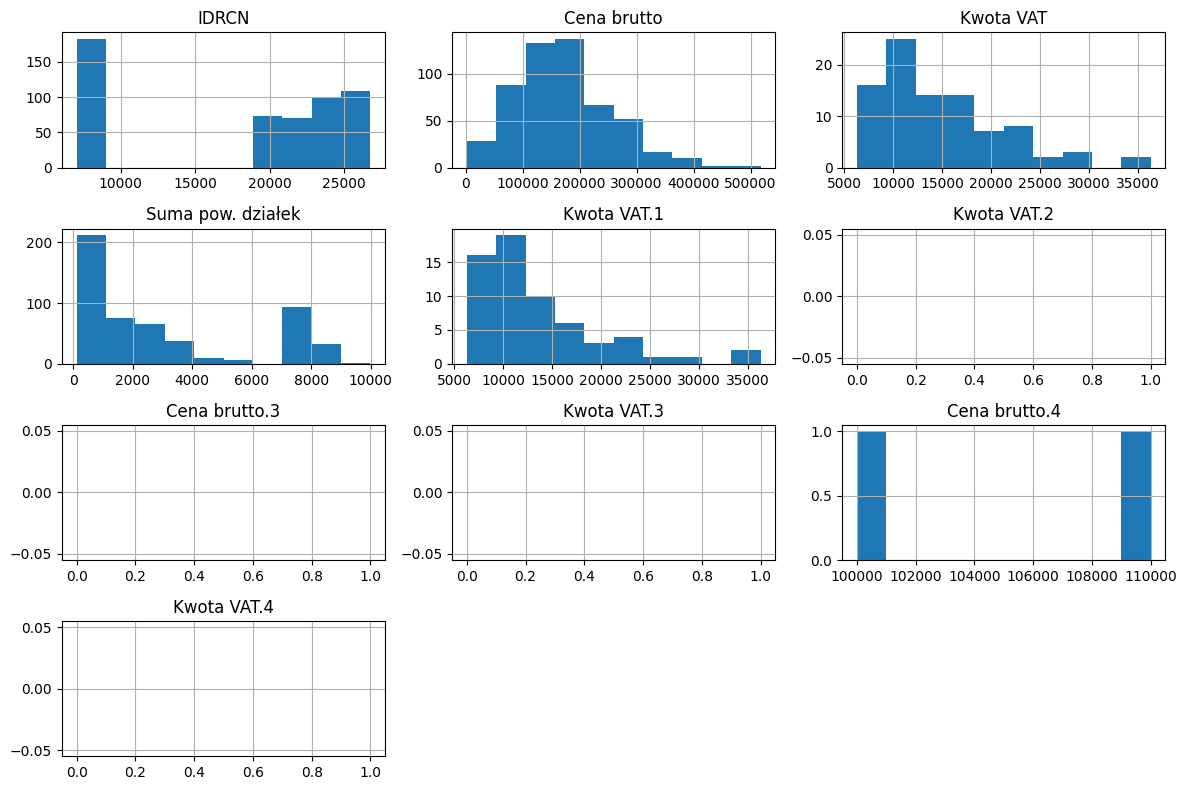

In [386]:
dwellings.hist(bins=10, figsize=(12, 8))
plt.tight_layout()
plt.show()

### 2.3.0 Data pre-cleaning

#### 2.3.1 Removal of Insignificant Features

In [387]:
dwellings = dwellings.drop(columns=['Jednostka ewid.',
                                    'Dokument',
                                    'IDRCN',
                                    'Opis',
                                    'Strona sprzedająca',
                                    'Strona kupująca',
                                    'Kwota VAT',
                                    'Suma pow. działek',
                                    'Opis nier.',
                                    'Rodzaj prawa',
                                    'Udział',
                                    'Pole powierzchni gruntowej',
                                    'Cena brutto.1',
                                    'Kwota VAT.1',
                                    'Obręb',
                                    'Numer',
                                    'Powierzchnia',
                                    'Opis.1',
                                    'MPZP',
                                    'Sposób użytkowania',
                                    'Cena brutto.2',
                                    'Kwota VAT.2',
                                    'Adres(y)',
                                    'Obręb.1',
                                    'Numer.1',
                                    'Opis.2',
                                    'Pow. użytkowa',
                                    'Cena brutto.3',
                                    'Kwota VAT.3',
                                    'Adres(y).1',
                                    'Obręb.2',
                                    'Numer.2',
                                    'Opis.3',
                                    'Funkcja lokalu',
                                    'Cena brutto.4',
                                    'Kwota VAT.4',
                                    'Adres(y).2'
                                    ])

In [388]:
dwellings.head()

,Data dokumentu,Forma obrotu,Rynek,Cena brutto,Nieruchomość,Rodzaj budynku,Liczba izb,Kondygnacja,Powierzchnia użytkowa,Pow.uż.p.p
0,03/01/2019,wolny rynek,wtórny,100000.0,lokalowa,biurowy,3,3,45.90,5.30
1,14/01/2019,wolny rynek,wtórny,100000.0,lokalowa,mieszkalny,3,2,48.45,0.00
2,11/01/2019,wolny rynek,wtórny,82500.0,lokalowa,mieszkalny,2,4,38.22,0.00
3,02/01/2019,wolny rynek,wtórny,180000.0,lokalowa,mieszkalny,4,NaN,66.50,0.00
4,04/01/2019,wolny rynek,wtórny,140000.0,lokalowa,mieszkalny,2,3,51.35,0.00


In [389]:
dwellings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Data dokumentu         534 non-null    object 
 1   Forma obrotu           534 non-null    object 
 2   Rynek                  503 non-null    object 
 3   Cena brutto            534 non-null    float64
 4   Nieruchomość           534 non-null    object 
 5   Rodzaj budynku         493 non-null    object 
 6   Liczba izb             531 non-null    object 
 7   Kondygnacja            440 non-null    object 
 8   Powierzchnia użytkowa  534 non-null    object 
 9   Pow.uż.p.p             534 non-null    object 
dtypes: float64(1), object(9)
memory usage: 41.8+ KB


In [390]:
dwellings.dtypes.value_counts()

object     9
float64    1
dtype: int64

In [391]:
dwellings['Forma obrotu'].value_counts()

wolny rynek                             508
sprzedaż z bonifikatą                    16
sprzedaż w postepowaniu egzekucyjnym      9
sprzedaż bezprzetargowa                   1
Name: Forma obrotu, dtype: int64

In [392]:
dwellings['Rynek'].value_counts()

wtórny       380
pierwotny    123
Name: Rynek, dtype: int64

In [393]:
dwellings['Nieruchomość'].value_counts()

lokalowa                                   517
lokalowa\ngruntowa niezabudowana             9
lokalowa\nlokalowa                           3
gruntowa zabudowana\nlokalowa                3
gruntowa niezabudowana                       1
gruntowa zabudowana\nlokalowa\nlokalowa      1
Name: Nieruchomość, dtype: int64

In [394]:
dwellings['Rodzaj budynku'].value_counts()

mieszkalny                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [395]:
dwellings['Kondygnacja'].value_counts()

1             111
3             108
2             105
4              76
5              34
1\n1            2
2\n             1
1\n2\n2\n1      1
1\n             1
3\n             1
Name: Kondygnacja, dtype: int64

In [396]:
dwellings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Data dokumentu         534 non-null    object 
 1   Forma obrotu           534 non-null    object 
 2   Rynek                  503 non-null    object 
 3   Cena brutto            534 non-null    float64
 4   Nieruchomość           534 non-null    object 
 5   Rodzaj budynku         493 non-null    object 
 6   Liczba izb             531 non-null    object 
 7   Kondygnacja            440 non-null    object 
 8   Powierzchnia użytkowa  534 non-null    object 
 9   Pow.uż.p.p             534 non-null    object 
dtypes: float64(1), object(9)
memory usage: 41.8+ KB


#### 2.3.2 Elimination of Insignificant Rows


In [397]:
kondygnacje = ['1', '2', '3', '4', '5']

dwellings = dwellings.loc[
    (dwellings['Forma obrotu'] == 'wolny rynek') &
    (dwellings['Nieruchomość'] == 'lokalowa') &
    (dwellings['Rodzaj budynku'] == 'mieszkalny') &
    (dwellings['Kondygnacja'].isin(kondygnacje))
]


#### 2.3.3 Replacement/Removal of Null values




In [398]:
dwellings.isnull().any()

Data dokumentu           False
Forma obrotu             False
Rynek                     True
Cena brutto              False
Nieruchomość             False
Rodzaj budynku           False
Liczba izb               False
Kondygnacja              False
Powierzchnia użytkowa    False
Pow.uż.p.p               False
dtype: bool

In [399]:
dwellings.isnull().sum()

Data dokumentu            0
Forma obrotu              0
Rynek                    13
Cena brutto               0
Nieruchomość              0
Rodzaj budynku            0
Liczba izb                0
Kondygnacja               0
Powierzchnia użytkowa     0
Pow.uż.p.p                0
dtype: int64

In [400]:
dwellings[dwellings.isnull().any(axis=1)]


,Data dokumentu,Forma obrotu,Rynek,Cena brutto,Nieruchomość,Rodzaj budynku,Liczba izb,Kondygnacja,Powierzchnia użytkowa,Pow.uż.p.p
430,01/12/2022,wolny rynek,NaN,275000.0,lokalowa,mieszkalny,4,2,65.05,0.00
435,09/08/2022,wolny rynek,NaN,340000.0,lokalowa,mieszkalny,4,2,60.30,6.10
491,25/04/2023,wolny rynek,NaN,370000.0,lokalowa,mieszkalny,4,3,92.80,0.00
494,26/04/2023,wolny rynek,NaN,300000.0,lokalowa,mieszkalny,4,4,65.00,6.40
501,03/07/2023,wolny rynek,NaN,200000.0,lokalowa,mieszkalny,4,3,57.21,0.00
502,06/07/2023,wolny rynek,NaN,150000.0,lokalowa,mieszkalny,2,2,35.50,0.00
503,21/07/2023,wolny rynek,NaN,190000.0,lokalowa,mieszkalny,3,3,51.50,3.40
505,25/07/2023,wolny rynek,NaN,100000.0,lokalowa,mieszkalny,3,3,37.84,0.00
511,25/08/2023,wolny rynek,NaN,115000.0,lokalowa,mieszkalny,2,3,47.61,0.00
517,13/09/2023,wolny rynek,NaN,365000.0,lokalowa,mieszkalny,2,3,60.60,11.30


In [401]:
Q1 = dwellings['Cena brutto'].quantile(0.25)
Q3 = dwellings['Cena brutto'].quantile(0.75)

def determine_market(cena):
    if cena < Q1:
        return 'pierwotny'
    else:
        return 'wtórny'


dwellings.loc[:, 'Rynek'] = dwellings['Cena brutto'].apply(determine_market)



<ipython-input-401-27f35b04faae>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dwellings.loc[:, 'Rynek'] = dwellings['Cena brutto'].apply(determine_market)


In [402]:
dwellings.isnull().any()

Data dokumentu           False
Forma obrotu             False
Rynek                    False
Cena brutto              False
Nieruchomość             False
Rodzaj budynku           False
Liczba izb               False
Kondygnacja              False
Powierzchnia użytkowa    False
Pow.uż.p.p               False
dtype: bool

#### 2.3.4 Leaving key features

In [403]:
dwellings = dwellings.drop(columns=['Forma obrotu', 'Nieruchomość', 'Rodzaj budynku'])

In [404]:
dwellings = dwellings.reset_index(drop=True)

In [405]:
dwellings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Data dokumentu         245 non-null    object 
 1   Rynek                  245 non-null    object 
 2   Cena brutto            245 non-null    float64
 3   Liczba izb             245 non-null    object 
 4   Kondygnacja            245 non-null    object 
 5   Powierzchnia użytkowa  245 non-null    object 
 6   Pow.uż.p.p             245 non-null    object 
dtypes: float64(1), object(6)
memory usage: 13.5+ KB


### 2.4.0 Setting of data types

In [406]:
dwellings['Data dokumentu'] = pd.to_datetime(dwellings['Data dokumentu'], format='%d/%m/%Y')
dwellings['Rynek'] = dwellings['Rynek'].astype('category')
dwellings['Cena brutto'] = dwellings['Cena brutto'].astype('float64')
dwellings['Liczba izb'] = dwellings['Liczba izb'].astype('int64')
dwellings['Kondygnacja'] = dwellings['Kondygnacja'].astype('int64')
dwellings['Powierzchnia użytkowa'] = dwellings['Powierzchnia użytkowa'].astype('float64')
dwellings['Pow.uż.p.p'] = dwellings['Pow.uż.p.p'].astype('float64')

In [407]:
dwellings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Data dokumentu         245 non-null    datetime64[ns]
 1   Rynek                  245 non-null    category      
 2   Cena brutto            245 non-null    float64       
 3   Liczba izb             245 non-null    int64         
 4   Kondygnacja            245 non-null    int64         
 5   Powierzchnia użytkowa  245 non-null    float64       
 6   Pow.uż.p.p             245 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(3), int64(2)
memory usage: 12.0 KB


In [408]:
dwellings.head()


,Data dokumentu,Rynek,Cena brutto,Liczba izb,Kondygnacja,Powierzchnia użytkowa,Pow.uż.p.p
0,2019-01-14,pierwotny,100000.0,3,2,48.45,0.00
1,2019-01-11,pierwotny,82500.0,2,4,38.22,0.00
2,2019-01-04,wtórny,140000.0,2,3,51.35,0.00
3,2019-02-01,wtórny,240000.0,3,2,61.00,2.97
4,2019-02-14,pierwotny,100000.0,3,1,37.60,2.50
